In [1]:
import numpy as np

In [2]:
x_values = [i for i in range(11)]
x_values.append(50)
# x_values.append(1000)
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50]

In [3]:
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(12,)

In [4]:
x_train = x_train.reshape(-1,1)
x_train.shape

(12, 1)

In [5]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [50.]], dtype=float32)

In [6]:
y_values = [2*i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 101]

In [7]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(12,)

In [8]:
y_train = y_train.reshape(-1,1)
y_train.shape

(12, 1)

In [9]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.],
       [101.]], dtype=float32)

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

In [13]:
criterion = nn.MSELoss()

In [14]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
epochs = 10

In [16]:
for epoch in range(epochs):
    epoch += 1
    print(f'epoch {epoch}')
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))  # lable is result
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    print(outputs)
    
    # calculation loss
    loss = criterion(outputs, labels)
    print('loss')
    print(loss)
    
    # getting gradients w.r.t parameters
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    print(f'loss {loss.data}')
    
    print('parameters...')
    for param in model.parameters():
        print(param.data)

epoch 1
tensor([[ -0.4924],
        [ -0.7648],
        [ -1.0371],
        [ -1.3095],
        [ -1.5819],
        [ -1.8542],
        [ -2.1266],
        [ -2.3990],
        [ -2.6713],
        [ -2.9437],
        [ -3.2160],
        [-14.1106]], grad_fn=<ThAddmmBackward>)
loss
tensor(1302.9989, grad_fn=<MseLossBackward>)
loss 1302.9989013671875
parameters...
tensor([[0.8464]])
tensor([-0.4497])
epoch 2
tensor([[-0.4497],
        [ 0.3967],
        [ 1.2431],
        [ 2.0895],
        [ 2.9359],
        [ 3.7822],
        [ 4.6286],
        [ 5.4750],
        [ 6.3214],
        [ 7.1678],
        [ 8.0142],
        [41.8694]], grad_fn=<ThAddmmBackward>)
loss
tensor(351.3225, grad_fn=<MseLossBackward>)
loss 351.3224792480469
parameters...
tensor([[1.4264]])
tensor([-0.4266])
epoch 3
tensor([[-0.4266],
        [ 0.9999],
        [ 2.4263],
        [ 3.8528],
        [ 5.2792],
        [ 6.7057],
        [ 8.1321],
        [ 9.5586],
        [10.9850],
        [12.4115],
        [13.83

In [17]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ -0.38867623],
       [  1.6587389 ],
       [  3.7061539 ],
       [  5.753569  ],
       [  7.800984  ],
       [  9.848398  ],
       [ 11.895814  ],
       [ 13.943229  ],
       [ 15.9906435 ],
       [ 18.03806   ],
       [ 20.085474  ],
       [101.98207   ]], dtype=float32)

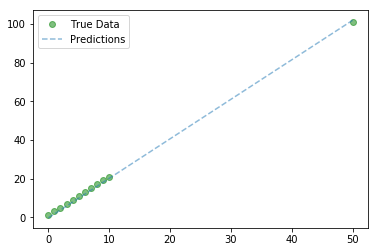

In [24]:
import matplotlib.pyplot as plt
# clear figure
plt.clf()

predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [19]:
# save the model, which contains the parameters learned from training
torch.save(model.state_dict(), 'linear_regression_model.pkl')

In [20]:
# load parameters learned
model.load_state_dict(torch.load('linear_regression_model.pkl'))

In [21]:
# how to predict the next value, for example x = 11 ???

In [22]:
model.linear.weight

Parameter containing:
tensor([[2.0474]], requires_grad=True)

In [23]:
# add some data in the training data, if add 50, the learing rate need change to 0.01
# add 1000 in training data, the result is bad
# it seems reducing learning_rate need increase epochs